In [1]:
'''
LAB: Glass Identification
'''

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [2]:
## PART 1

# read data into a DataFrame
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 header=None, names=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type'],
                 index_col='id')
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Question 1. Are there any null values? If so, where?
df.isnull().sum()


ri            0
na            0
mg            0
al            0
si            0
k             0
ca            0
ba            0
fe            0
glass_type    0
dtype: int64

In [5]:
# Question 2. Is this problem classification or regression?
df.glass_type.unique()
#Classification

array([1, 2, 3, 5, 6, 7])

In [6]:
# Question 3: Create a new column called "glass_type_binary"
# convert to binary classification problem:
#   types 1/2/3/4 are mapped to 0 in glass_type_binary
#   types 5/6/7 are mapped to 1 in glass_type_binary


def binary_type(x):
    if x in [1,2,3,4]:
        return 0
    else:
        return 1
    
df['glass_type_binary'] = df['glass_type'].apply(binary_type)


In [7]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,glass_type_binary
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [8]:
## PART 2 Setting it all up

# create a list of feature names
feature_cols = ['ri','na','mg','al','si','k','ca','ba','fe']


# define X (features) and y (response)
X = df[feature_cols]        # features
y = df.glass_type_binary    # binary response
y2 = df.glass_type          # multinomial response

In [9]:
# the null accuracy rate is an accuracy rate in which you always predict the majority class in
# a prediction problem. 


# Question 4: What is the null accuracy rate for the binomial and the multinomial problem?
y.value_counts()
y.count()
y2.value_counts()
y2.count()

null_accuracyrate1 = y.value_counts()/y.count()
null_accuracyrate1

null_accuracyrate2 = y2.value_counts()/y2.count()
null_accuracyrate2


2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: glass_type, dtype: float64

In [16]:
null_accuracyrate1 = y.value_counts()/y.count()
null_accuracyrate1

0    0.761682
1    0.238318
Name: glass_type_binary, dtype: float64

In [24]:
# QUESTION - What does null accuracy mean? and how to calculate them?

0

In [56]:
## PART 3
# fit a KNN model and make predictions with the binary response. 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
knn.predict([1.52,13.64, 4.4, 1.10,71.78,0.06,8.75,0.0,0.0])[0]

# Question 5: Fit a KNN model with 1 3, and 5 neighbors
# Be sure to use cross validation to get an accurate prediction of out of sample error
k_range = range(1,6,2)
from sklearn.cross_validation import cross_val_score
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    s = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    scores = np.append(scores, s)
scores
# plotting the kvalues and CV scores # THIS IS THROWING AN ERROR
#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.figure()
#plt.plot(k_range, scores)


array([ 0.95454545,  0.86046512,  0.93023256,  0.78571429,  0.97619048,
        0.90909091,  0.8372093 ,  0.88372093,  0.71428571,  0.97619048,
        0.84090909,  0.86046512,  0.88372093,  0.71428571,  1.        ])

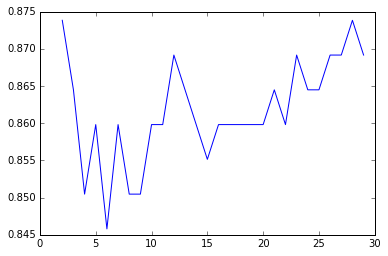

In [51]:
# Question 6: Use grid search to find the optimal value of K and the best accuracy rate
from sklearn.grid_search import GridSearchCV
k_range = range(2,30,1) # since K=1 is overfitting
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
grid.grid_scores_
# mean value
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores

# best scores
grid.best_score_

# optimal K value
grid.best_params_

#visualize the result
plt.figure()
plt.plot(k_range, grid_mean_scores)


In [54]:
#Question 7: did your best score beat the null accuracy rate for the binary response?
grid.best_score_ > null_accuracyrate1[0] # Yes it beat the null accuracy rate for the binary response. 
#grid.best_score_ #value is 0.87383177570093462



True

In [67]:
## PART 4
# fit a KNN model and make predictions with the multinomial response. 


# Question 8: Fit a KNN model with 1 3, and 5 neighbors
# Be sure to use cross validation to get an accurate prediction of out of sample error
k_range = range(1,6,2)
for k in k_range:
    knn = KNeighborsClassifier()
    s = cross_val_score(knn, X, y2, cv=5, scoring = 'accuracy')
    mean_s = np.mean(s)
    scores = np.append(scores, mean_s)



#Visualizing the results - THROWING AN ERROR
#plt.figure()
#plt.plot(k_range, scores)




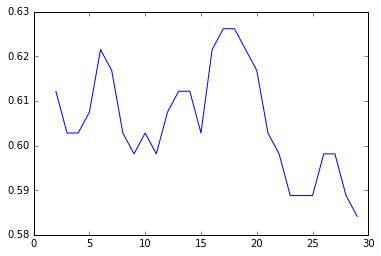

In [70]:

# Question 9: Use grid search to find the optimal value of K and the best accuracy rate

from sklearn.grid_search import GridSearchCV
k_range = range(2,30,1) # since K=1 is overfitting
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y2)
grid.grid_scores_
# mean value
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores

# best scores
grid.best_score_  # is 0.62616822429906538

# optimal K value
grid.best_params_ # is {'n_neighbors': 17}

#visualize the result
plt.figure()
plt.plot(k_range, grid_mean_scores)


In [78]:
# Question 10: did your best score beat the null accuracy rate for the multinomial response?
print grid.best_score_ > null_accuracyrate2[1]
print grid.best_score_ > null_accuracyrate2[2]
print grid.best_score_ > null_accuracyrate2[3]

print grid.best_score_ > null_accuracyrate2[5]
print grid.best_score_ > null_accuracyrate2[6]
print grid.best_score_ > null_accuracyrate2[7]

True
True
True
True
True
True


****for binomial response****
0.883177570093
{'n_neighbors': 27}
('Yes. The accuracy rate is', 0.88317757009345799)
****for multinomial response****
0.672897196262
{'n_neighbors': 2}
('Yes. The accuracy rate is', 0.67289719626168221)
True
True
True
True
True
True


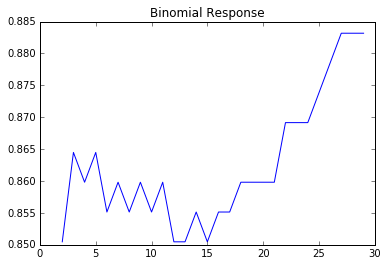

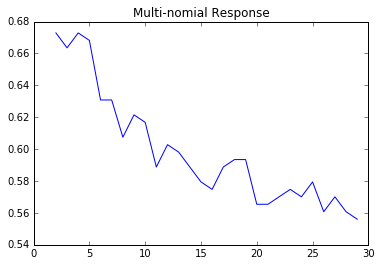

In [107]:
## PART 5 Fine tuning our data

# As we learned previously, KNN is sensitive to irrelevant and non-scaled columns
# Let's use sklearn to clean it up
from sklearn import preprocessing

# scale all data to a zero mean  and unit variance (std = 1)
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = feature_cols
X_scaled

# Question 11: Try all of the previous steps to grid search the optimal KNN model. 
# But this time used the scaled X values instead.

print('****for binomial response****')
k_range = range(2,30,1) # since K=1 is overfitting
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)
grid.grid_scores_
mean_gridscores = [result[1] for result in grid.grid_scores_]
print grid.best_score_
print grid.best_params_

# Do you better accuracy with scaled data?
print("Yes. The accuracy rate is", grid.best_score_)
grid.best_score_ > null_accuracyrate1[1]

# visualize the result:
plt.figure()
plt.plot(k_range,mean_gridscores) #, title = 'Binomial response') - why can't the title be defined inside the plot?
plt.title('Binomial Response')


print('****for multinomial response****')
k_range = range(2,30,1) # since K=1 is overfitting
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y2)
grid.grid_scores_
mean_gridscores = [result[1] for result in grid.grid_scores_]
print grid.best_score_
print grid.best_params_

# Do you better accuracy with scaled data?
print("Yes. The accuracy rate is", grid.best_score_)
grid.best_score_ > null_accuracyrate2[1]
print grid.best_score_ > null_accuracyrate2[1]
print grid.best_score_ > null_accuracyrate2[2]
print grid.best_score_ > null_accuracyrate2[3]

print grid.best_score_ > null_accuracyrate2[5]
print grid.best_score_ > null_accuracyrate2[6]
print grid.best_score_ > null_accuracyrate2[7]

# visualize the result:
plt.figure()
plt.plot(k_range,mean_gridscores) 
plt.title('Multi-nomial Response')


In [152]:
# Try playing around with different features (removing some) and seeing if this helps improve overall
# predictive power.
# Hint, try making a method that takes in feature columns and runs the entire process in order to compre
# faster


def all_feature_test(feature_cols, response, cv=5):
    feature_cols = ['ri','na','mg','al','si','k','ca','ba', 'fe'] # as defined earlier in this lab
    cmax = len(feature_cols)
    k_range = range(2,30,1) # since K=1 is overfitting
    #best_feature = []
    best_score = 0
    best_k = 0
    
    X_new = X[feature_cols[0:cmax]]
    y = response
    #k_range = range(2,kmax,ki)
    for cmax in range(1,len(feature_cols)):
        knn = KNeighborsClassifier()
        param_grid = dict(n_neighbors=k_range)
        grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
        grid.fit(X_new, y)
        grid.grid_scores_
        mean_gridscores = [result[1] for result in grid.grid_scores_]
        best_score = grid.best_score_
        if best_score > grid.best_score_:
            best_score = grid.best_score_
            best_mean_score = mean_gridscores
            best_k = grid.best_params_
        cmax -= 1
        
        
    print("Best score for", cmax, "columns of features", best_score)
    print("Optimal K values", best_k)
    print("best_feature_set = ", feature_cols[0:cmax])
        
        

In [153]:
feature_cols = ['ri','na','mg','al','si','k','ca','ba', 'fe']
response = y
all_feature_test(feature_cols, response, cv=5)



('Best score for', 7, 'columns of features', 0.87383177570093462)
('Optimal K values', 0)
('best_feature_set = ', ['ri', 'na', 'mg', 'al', 'si', 'k', 'ca'])
